In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [3]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [4]:
!ls

'컨텐츠 기반 필터링 사용한 반려식물 추천 서비스'
'딥러닝 기법을 활용한 한정판 스니커즈 리셀 가능여부 및 가격 예측 프로젝트'
 행운의편지
'2017,18,20 여의도 한강공원 방문자수.xlsx'
'2017-2019 이촌 한강공원 방문자수.xlsx'
'2017-2019 난지 한강공원 방문자수.xlsx'
'2019100889 산업경영공학과 이수진 (인공지능론 텀프로젝트).pptx'
 Classroom
'Colab Notebooks'
'서울특별시 빅데이터 캠퍼스.gdoc'
'할 일 목록.gsheet'
 kfood_final
 model
 nlp_liflow


In [28]:
df = pd.read_excel('2017,18,20 여의도 한강공원 방문자수.xlsx', engine='openpyxl')
df = df[['일반이용자(아침)',	'일반이용자(낮)',	'일반이용자(저녁)','합계']]
df

,일반이용자(아침),일반이용자(낮),일반이용자(저녁),합계
0,550,2410,2310.0,5270
1,237,3550,2443.0,6230
2,503,3640,3354.0,7497
3,2310,1697,3420.0,7427
4,510,2484,2320.0,5314
...,...,...,...,...
1091,110,2000,2200.0,4310
1092,230,2530,1580.0,4340
1093,450,700,1270.0,2420
1094,60,920,430.0,1410


In [29]:
df_check=df.isna()

check_for_any_nan= df.isna().values.any()
# Or
check_for_any_nan= df.isna().any().any()
total_nan_values = df.isna().sum().sum()
print(df_check)
print("NaN Presence:"+str(check_for_any_nan))
print ("Total Number of NaN values:"+str(total_nan_values))

      일반이용자(아침)  일반이용자(낮)  일반이용자(저녁)     합계
0         False     False      False  False
1         False     False      False  False
2         False     False      False  False
3         False     False      False  False
4         False     False      False  False
...         ...       ...        ...    ...
1091      False     False      False  False
1092      False     False      False  False
1093      False     False      False  False
1094      False     False      False  False
1095      False     False      False  False

[1096 rows x 4 columns]
NaN Presence:True
Total Number of NaN values:1


In [6]:
from sklearn.preprocessing import MinMaxScaler

#df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['일반이용자(아침)',	'일반이용자(낮)',	'일반이용자(저녁)','합계']
stocks_scaled = scaler.fit_transform(df[scale_cols])
stocks_scaled = pd.DataFrame(stocks_scaled)
stocks_scaled.columns = scale_cols
stocks_scaled

,일반이용자(아침),일반이용자(낮),일반이용자(저녁),합계
0,0.072700,0.006025,0.006230,0.006495
1,0.026261,0.008973,0.006602,0.007780
2,0.065727,0.009206,0.009147,0.009475
3,0.333828,0.004181,0.009332,0.009382
4,0.066766,0.006216,0.006258,0.006554
...,...,...,...,...
1091,0.007418,0.004965,0.005923,0.005210
1092,0.025223,0.006335,0.004191,0.005250
1093,0.057864,0.001603,0.003325,0.002681
1094,0.000000,0.002172,0.000978,0.001329


In [7]:
TEST_SIZE = int(len(stocks_scaled)*0.2)
print(TEST_SIZE)
WINDOW_SIZE = 7

train = stocks_scaled[:-TEST_SIZE]
test = stocks_scaled[-TEST_SIZE:]

219


In [8]:
def make_dataset(data, label, window_size=7):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [9]:
from sklearn.model_selection import train_test_split

feature_cols = ['일반이용자(아침)',	'일반이용자(낮)',	'일반이용자(저녁)','합계']
label_cols = ['합계']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 7)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((696, 7, 4), (174, 7, 4))

In [10]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((219, 4), (219, 1))

In [11]:
test_feature, test_label = make_dataset(test_feature, test_label, 7)
test_feature.shape, test_label.shape

((212, 7, 4), (212, 1))

In [12]:
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from keras.layers import Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

## 여기서부터 모델 짜기

In [13]:
model = tf.keras.Sequential()
model.add(LSTM(64, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='sigmoid', 
               return_sequences=False)
          )
model.add(Dense(16, activation='relu'))
#model.add(Flatten())
model.add(Dense(1))

In [14]:
import os
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=5,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
134/140 [===========================>..] - ETA: 0s - loss: 0.0024 - mse: 0.0048
Epoch 1: val_loss improved from inf to 0.00042, saving model to model/tmp_checkpoint.h5
140/140 [==============================] - 4s 12ms/step - loss: 0.0023 - mse: 0.0047 - val_loss: 4.1950e-04 - val_mse: 8.3900e-04
Epoch 2/200
135/140 [===========================>..] - ETA: 0s - loss: 0.0017 - mse: 0.0034
Epoch 2: val_loss improved from 0.00042 to 0.00030, saving model to model/tmp_checkpoint.h5
140/140 [==============================] - 1s 7ms/step - loss: 0.0016 - mse: 0.0033 - val_loss: 2.9922e-04 - val_mse: 5.9845e-04
Epoch 3/200
136/140 [============================>.] - ETA: 0s - loss: 0.0017 - mse: 0.0033
Epoch 3: val_loss improved from 0.00030 to 0.00025, saving model to model/tmp_checkpoint.h5
140/140 [==============================] - 1s 7ms/step - loss: 0.0016 - mse: 0.0032 - val_loss: 2.4506e-04 - val_mse: 4.9012e-04
Epoch 4/200
133/140 [===========================>..] - ETA: 0s -

In [15]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

7/7 [==============================] - 0s 4ms/step


(212, 1)

In [20]:
print(test_feature)

[[[0.12462908 0.02565163 0.01654001 0.0220596 ]
  [0.13204748 0.02306578 0.01654001 0.02078819]
  [0.13946588 0.02565163 0.01933393 0.02353176]
  ...
  [0.15430267 0.03728796 0.02631873 0.03303386]
  [0.12462908 0.01789408 0.01654001 0.01804463]
  [0.0504451  0.00884361 0.01095217 0.01001468]]

 [[0.13204748 0.02306578 0.01654001 0.02078819]
  [0.13946588 0.02565163 0.01933393 0.02353176]
  [0.15430267 0.02823748 0.02771569 0.02901889]
  ...
  [0.12462908 0.01789408 0.01654001 0.01804463]
  [0.0504451  0.00884361 0.01095217 0.01001468]
  [0.12462908 0.02306578 0.01654001 0.02072128]]

 [[0.13946588 0.02565163 0.01933393 0.02353176]
  [0.15430267 0.02823748 0.02771569 0.02901889]
  [0.15430267 0.03728796 0.02631873 0.03303386]
  ...
  [0.0504451  0.00884361 0.01095217 0.01001468]
  [0.12462908 0.02306578 0.01654001 0.02072128]
  [0.13204748 0.02306578 0.01654001 0.02078819]]

 ...

 [[0.07418398 0.00281858 0.00226308 0.00294833]
  [0.0074184  0.00346504 0.00318507 0.00312231]
  [0.03264

In [19]:
import statsmodels.api as sm
mse,mae = model.evaluate(test_feature , test_label, batch_size=16)
print("mse : ", mse)
print("mae : ", mae)
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(test_label, pred))
print('RMSE : ', RMSE(test_label, pred))

from sklearn.metrics import r2_score
r2_y_predict = r2_score(test_label, pred)
print('R2 : ', r2_y_predict)

from sklearn.metrics import median_absolute_error
MedAE_y_predict = median_absolute_error(test_label, pred)
print('MedAE : ', MedAE_y_predict)

14/14 [==============================] - 0s 3ms/step - loss: nan - mse: nan          
mse :  nan
mae :  nan


ValueError: ignored

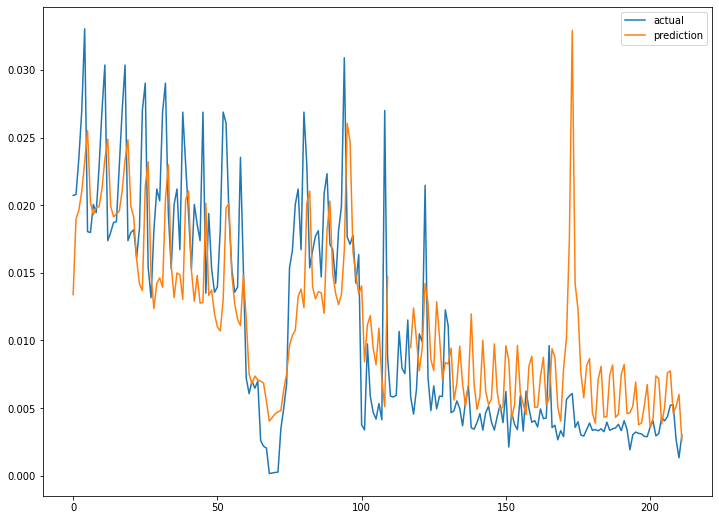

In [18]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()